In [1]:
#https://github.com/thiagorsena/base_tcc/blob/main/campeonato-brasileiro-full.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, Counter

In [3]:
#Load dataset
url = "https://raw.githubusercontent.com/thiagorsena/base_tcc/refs/heads/main/campeonato-brasileiro-full.csv"

df = pd.read_csv(url)

df.head()

,Horário,Dia,Data,Clube 1,Clube 2,Vencedor,Rodada,Arena,Clube 1 Gols,Clube 2 Gols,Clube 1 Estado,Clube 2 Estado,Estado Clube Vencedor
0,16h00,Sábado,2000-07-29,Fluminense,Bahia,Fluminense,1ª Rodada,Maracanã,2,0,RJ,BA,RJ
1,16h00,Sábado,2000-07-29,Vasco,Sport,Sport,1ª Rodada,São Januário,0,2,RJ,PE,PE
2,16h00,Sábado,2000-07-29,Vitória,Palmeiras,Vitória,1ª Rodada,Barradão,4,1,ES,SP,ES
3,17h00,Domingo,2000-07-30,Botafogo-RJ,Atlético-MG,-,1ª Rodada,Caio Martins,0,0,RJ,MG,Empate
4,18h30,Domingo,2000-07-30,Juventude,Flamengo,-,1ª Rodada,Alfredo Jaconi,1,1,RS,RJ,Empate


In [4]:
df.dtypes

,0
Horário,object
Dia,object
Data,object
Clube 1,object
Clube 2,object
Vencedor,object
Rodada,object
Arena,object
Clube 1 Gols,int64
Clube 2 Gols,int64


In [ ]:
df.head()

,rodada,data,mandante,visitante,arena,mandante_placar,visitante_placar,temporada
0,1,2003-03-29,Guarani,Vasco,Brinco de Ouro,4,2,2003
1,1,2003-03-29,Athletico-PR,Gremio,Arena da Baixada,2,0,2003
2,1,2003-03-30,Flamengo,Coritiba,Maracanã,1,1,2003
3,1,2003-03-30,Goias,Paysandu,Serra Dourada,2,2,2003
4,1,2003-03-30,Internacional,Ponte Preta,Beira Rio,1,1,2003


In [5]:
df.isnull().sum()

,0
Horário,347
Dia,0
Data,0
Clube 1,0
Clube 2,0
Vencedor,0
Rodada,0
Arena,0
Clube 1 Gols,0
Clube 2 Gols,0


In [6]:
df.drop(['Horário', 'Dia'], axis=1, inplace = True)
df.head()

,Data,Clube 1,Clube 2,Vencedor,Rodada,Arena,Clube 1 Gols,Clube 2 Gols,Clube 1 Estado,Clube 2 Estado,Estado Clube Vencedor
0,2000-07-29,Fluminense,Bahia,Fluminense,1ª Rodada,Maracanã,2,0,RJ,BA,RJ
1,2000-07-29,Vasco,Sport,Sport,1ª Rodada,São Januário,0,2,RJ,PE,PE
2,2000-07-29,Vitória,Palmeiras,Vitória,1ª Rodada,Barradão,4,1,ES,SP,ES
3,2000-07-30,Botafogo-RJ,Atlético-MG,-,1ª Rodada,Caio Martins,0,0,RJ,MG,Empate
4,2000-07-30,Juventude,Flamengo,-,1ª Rodada,Alfredo Jaconi,1,1,RS,RJ,Empate


In [7]:
df.dtypes

,0
Data,object
Clube 1,object
Clube 2,object
Vencedor,object
Rodada,object
Arena,object
Clube 1 Gols,int64
Clube 2 Gols,int64
Clube 1 Estado,object
Clube 2 Estado,object


In [8]:
df['Data'] = pd.to_datetime(df['Data'])
df = df[df['Data'].dt.year >= 2003]

In [9]:
def change_winner_name(row):
    if (row['Vencedor'] == row['Clube 1']):
        return 0
    elif (row['Vencedor'] == row['Clube 2']):
        return 1
    else:
        return 2

df['Vencedor'] = df.apply(change_winner_name, axis=1)

In [10]:
df.drop(['Clube 1 Estado', 'Clube 2 Estado', 'Estado Clube Vencedor'], axis=1, inplace = True)

In [11]:
df.reset_index(drop=True, inplace = True)

In [12]:
df.head()

,Data,Clube 1,Clube 2,Vencedor,Rodada,Arena,Clube 1 Gols,Clube 2 Gols
0,2003-03-29,Athlético-PR,Grêmio,0,1ª Rodada,Arena da Baixada,2,0
1,2003-03-29,Guarani,Vasco,0,1ª Rodada,Brinco de Ouro,4,2
2,2003-03-30,Fortaleza,Bahia,2,1ª Rodada,Castelão,0,0
3,2003-03-30,Flamengo,Coritiba,2,1ª Rodada,Maracanã,1,1
4,2003-03-30,Vitória,Figueirense,2,1ª Rodada,Barradão,1,1


In [13]:
df['Rodada'] = [int(x.split('ª')[0]) for x in df['Rodada'].values]

In [14]:
df['Clube 1'] = [x.lower() for x in df['Clube 1'].values]
df['Clube 2'] = [x.lower() for x in df['Clube 2'].values]

In [15]:
df.head()

,Data,Clube 1,Clube 2,Vencedor,Rodada,Arena,Clube 1 Gols,Clube 2 Gols
0,2003-03-29,athlético-pr,grêmio,0,1,Arena da Baixada,2,0
1,2003-03-29,guarani,vasco,0,1,Brinco de Ouro,4,2
2,2003-03-30,fortaleza,bahia,2,1,Castelão,0,0
3,2003-03-30,flamengo,coritiba,2,1,Maracanã,1,1
4,2003-03-30,vitória,figueirense,2,1,Barradão,1,1


In [16]:
df.shape

(3946, 8)

In [17]:
df['Temporada'] = df['Data'].dt.year

In [18]:
df['Temporada']

,Temporada
0,2003
1,2003
2,2003
3,2003
4,2003
...,...
3941,2012
3942,2012
3943,2012
3944,2012


In [19]:
pd.options.mode.chained_assignment = None

In [21]:
temporadas = df['Temporada'].value_counts().index.sort_values().values

df['Wins Home Team'] = df['Clube 1']
df['Wins Away Team'] = df['Clube 1']

df['Loss Home Team'] = df['Clube 1']
df['Loss Away Team'] = df['Clube 1']

df['Draw Home Team'] = df['Clube 1']
df['Draw Away Team'] = df['Clube 1']

for temporada in  temporadas:
    dft = df[df['Temporada'] == temporada]

    for index, row in dft.iterrows():
        df_home = dft[(dft['Rodada'] < row['Rodada']) & (dft['Clube 1'] == row['Clube 1'])]
        c1_wins = 0
        c1_loss = 0
        c1_draw = 0
        for index2, row2 in df_home.iterrows():
            if row2['Vencedor'] == 0:
                c1_wins+=1
            elif row2['Vencedor'] == 1:
                c1_loss+=1
            elif row2['Vencedor'] == 2:
                c1_draw+=1

        df_away = dft[(dft['Rodada'] < row['Rodada']) & (dft['Clube 2'] == row['Clube 1'])]
        for index2, row2 in df_away.iterrows():
            if row2['Vencedor'] == 1:
                c1_wins+=1
            elif row2['Vencedor'] == 0:
                c1_loss+=1
            elif row2['Vencedor'] == 2:
                c1_draw+=1


        df_home = dft[(dft['Rodada'] < row['Rodada']) & (dft['Clube 1'] == row['Clube 2'])]
        c2_wins = 0
        c2_loss = 0
        c2_draw = 0
        for index2, row2 in df_home.iterrows():
            if row2['Vencedor'] == 0:
                c2_wins+=1
            elif row2['Vencedor'] == 1:
                c2_loss+=1
            elif row2['Vencedor'] == 2:
                c2_draw+=1

        df_away = dft[(dft['Rodada'] < row['Rodada']) & (dft['Clube 2'] == row['Clube 2'])]
        for index2, row2 in df_away.iterrows():
            if row2['Vencedor'] == 1:
                c2_wins+=1
            elif row2['Vencedor'] == 0:
                c2_loss+=1
            elif row2['Vencedor'] == 2:
                c2_draw+=1


        df.at[index, 'Wins Home Team'] = c1_wins
        df.at[index, 'Wins Away Team'] = c2_wins

        df.at[index, 'Loss Home Team'] = c1_loss
        df.at[index, 'Loss Away Team'] = c2_loss

        df.at[index, 'Draw Home Team'] = c1_draw
        df.at[index, 'Draw Away Team'] = c2_draw

In [22]:
df.tail()

,Data,Clube 1,Clube 2,Vencedor,Rodada,Arena,Clube 1 Gols,Clube 2 Gols,Temporada,Wins Home Team,Wins Away Team,Loss Home Team,Loss Away Team,Draw Home Team,Draw Away Team
3941,2012-07-18,náutico,ponte preta,0,10,Aflitos,3,0,2012,3,4,5,2,1,3
3942,2012-07-18,são paulo,vasco,1,10,Morumbi,0,1,2012,5,6,3,1,1,2
3943,2012-07-19,coritiba,palmeiras,2,10,Couto Pereira,1,1,2012,2,1,5,5,2,3
3944,2012-07-19,atlético-go,figueirense,0,10,Serra Dourada,3,2,2012,0,1,7,3,2,5
3945,2012-07-19,fluminense,bahia,0,10,Engenhão,4,0,2012,5,1,0,4,4,4


In [23]:
def find_wins_home(ser):
    wins = [0]

    [wins.append(wins[-1]+1) if win==0 else wins.append(wins[-1]) for win in ser.values]

    return wins[0:-1]

def find_wins_away(ser):
    wins = [0]

    [wins.append(wins[-1]+1) if win==1 else wins.append(wins[-1]) for win in ser.values]

    return wins[0:-1]

def find_draws(ser):
    wins = [0]

    [wins.append(wins[-1]+1) if win==2 else wins.append(wins[-1]) for win in ser.values]

    return wins[0:-1]

df['Wins Home Home Team'] = df.groupby(['Temporada', 'Clube 1'])['Vencedor'].transform(lambda x: find_wins_home(x))
df['Loss Home Home Team'] = df.groupby(['Temporada', 'Clube 1'])['Vencedor'].transform(lambda x: find_wins_away(x))
df['Wins Away Away Team'] = df.groupby(['Temporada', 'Clube 2'])['Vencedor'].transform(lambda x: find_wins_away(x))
df['Loss Away Away Team'] = df.groupby(['Temporada', 'Clube 2'])['Vencedor'].transform(lambda x: find_wins_home(x))
df['Draws Home Home Team'] = df.groupby(['Temporada', 'Clube 1'])['Vencedor'].transform(lambda x: find_draws(x))
df['Draws Away Away Team'] = df.groupby(['Temporada', 'Clube 2'])['Vencedor'].transform(lambda x: find_draws(x))

In [24]:
df.tail()

,Data,Clube 1,Clube 2,Vencedor,Rodada,Arena,Clube 1 Gols,Clube 2 Gols,Temporada,Wins Home Team,...,Loss Home Team,Loss Away Team,Draw Home Team,Draw Away Team,Wins Home Home Team,Loss Home Home Team,Wins Away Away Team,Loss Away Away Team,Draws Home Home Team,Draws Away Away Team
3941,2012-07-18,náutico,ponte preta,0,10,Aflitos,3,0,2012,3,...,5,2,1,3,2,1,1,1,1,2
3942,2012-07-18,são paulo,vasco,1,10,Morumbi,0,1,2012,5,...,3,1,1,2,4,0,2,0,0,2
3943,2012-07-19,coritiba,palmeiras,2,10,Couto Pereira,1,1,2012,2,...,5,5,2,3,2,1,0,4,1,0
3944,2012-07-19,atlético-go,figueirense,0,10,Serra Dourada,3,2,2012,0,...,7,3,2,5,0,3,0,2,1,2
3945,2012-07-19,fluminense,bahia,0,10,Engenhão,4,0,2012,5,...,0,4,4,4,2,0,0,2,2,2


In [25]:
df['Home Wins'] = [1 if x == 0 else 0 for x in df['Vencedor'].values]
df['Away Wins'] = [1 if x == 1 else 0 for x in df['Vencedor'].values]

In [26]:
df.head()

,Data,Clube 1,Clube 2,Vencedor,Rodada,Arena,Clube 1 Gols,Clube 2 Gols,Temporada,Wins Home Team,...,Draw Home Team,Draw Away Team,Wins Home Home Team,Loss Home Home Team,Wins Away Away Team,Loss Away Away Team,Draws Home Home Team,Draws Away Away Team,Home Wins,Away Wins
0,2003-03-29,athlético-pr,grêmio,0,1,Arena da Baixada,2,0,2003,0,...,0,0,0,0,0,0,0,0,1,0
1,2003-03-29,guarani,vasco,0,1,Brinco de Ouro,4,2,2003,0,...,0,0,0,0,0,0,0,0,1,0
2,2003-03-30,fortaleza,bahia,2,1,Castelão,0,0,2003,0,...,0,0,0,0,0,0,0,0,0,0
3,2003-03-30,flamengo,coritiba,2,1,Maracanã,1,1,2003,0,...,0,0,0,0,0,0,0,0,0,0
4,2003-03-30,vitória,figueirense,2,1,Barradão,1,1,2003,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
def find_streak(ser):
    streak = [0]

    [streak.append(streak[-1]+1) if win==1 else streak.append(0) for win in ser.values]

    return streak[0:-1]

df['Home Winning Streak'] = df.groupby(['Temporada', 'Clube 1'])['Home Wins'].transform(lambda x: find_streak(x))

In [28]:
df['Home Losing Streak'] = df.groupby(['Temporada', 'Clube 1'])['Away Wins'].transform(lambda x: find_streak(x))
df['Away Winning Streak'] = df.groupby(['Temporada', 'Clube 2'])['Away Wins'].transform(lambda x: find_streak(x))
df['Away Losing Streak'] = df.groupby(['Temporada', 'Clube 2'])['Home Wins'].transform(lambda x: find_streak(x))

In [29]:
df.tail()

,Data,Clube 1,Clube 2,Vencedor,Rodada,Arena,Clube 1 Gols,Clube 2 Gols,Temporada,Wins Home Team,...,Wins Away Away Team,Loss Away Away Team,Draws Home Home Team,Draws Away Away Team,Home Wins,Away Wins,Home Winning Streak,Home Losing Streak,Away Winning Streak,Away Losing Streak
3941,2012-07-18,náutico,ponte preta,0,10,Aflitos,3,0,2012,3,...,1,1,1,2,1,0,0,1,0,1
3942,2012-07-18,são paulo,vasco,1,10,Morumbi,0,1,2012,5,...,2,0,0,2,0,1,4,0,0,0
3943,2012-07-19,coritiba,palmeiras,2,10,Couto Pereira,1,1,2012,2,...,0,4,1,0,0,0,0,1,0,4
3944,2012-07-19,atlético-go,figueirense,0,10,Serra Dourada,3,2,2012,0,...,0,2,1,2,1,0,0,3,0,2
3945,2012-07-19,fluminense,bahia,0,10,Engenhão,4,0,2012,5,...,0,2,2,2,1,0,2,0,0,1


In [30]:
df.drop(['Home Wins', 'Away Wins'], inplace=True, axis=1)

In [31]:
df.head()

,Data,Clube 1,Clube 2,Vencedor,Rodada,Arena,Clube 1 Gols,Clube 2 Gols,Temporada,Wins Home Team,...,Wins Home Home Team,Loss Home Home Team,Wins Away Away Team,Loss Away Away Team,Draws Home Home Team,Draws Away Away Team,Home Winning Streak,Home Losing Streak,Away Winning Streak,Away Losing Streak
0,2003-03-29,athlético-pr,grêmio,0,1,Arena da Baixada,2,0,2003,0,...,0,0,0,0,0,0,0,0,0,0
1,2003-03-29,guarani,vasco,0,1,Brinco de Ouro,4,2,2003,0,...,0,0,0,0,0,0,0,0,0,0
2,2003-03-30,fortaleza,bahia,2,1,Castelão,0,0,2003,0,...,0,0,0,0,0,0,0,0,0,0
3,2003-03-30,flamengo,coritiba,2,1,Maracanã,1,1,2003,0,...,0,0,0,0,0,0,0,0,0,0
4,2003-03-30,vitória,figueirense,2,1,Barradão,1,1,2003,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
def find_goals(ser):
    goals = [0]

    [goals.append(goals[-1]+goal) for goal in ser.values]

    return goals[0:-1]

In [33]:
df['Goals Scored at Home'] = df.groupby(['Temporada', 'Clube 1'])['Clube 1 Gols'].transform(lambda x: find_goals(x))
df['Goals Conceded at Home'] = df.groupby(['Temporada', 'Clube 1'])['Clube 2 Gols'].transform(lambda x: find_goals(x))

df['Goals Scored Away'] = df.groupby(['Temporada', 'Clube 2'])['Clube 2 Gols'].transform(lambda x: find_goals(x))
df['Goals Conceded Away'] = df.groupby(['Temporada', 'Clube 2'])['Clube 1 Gols'].transform(lambda x: find_goals(x))

In [34]:
df.tail()

,Data,Clube 1,Clube 2,Vencedor,Rodada,Arena,Clube 1 Gols,Clube 2 Gols,Temporada,Wins Home Team,...,Draws Home Home Team,Draws Away Away Team,Home Winning Streak,Home Losing Streak,Away Winning Streak,Away Losing Streak,Goals Scored at Home,Goals Conceded at Home,Goals Scored Away,Goals Conceded Away
3941,2012-07-18,náutico,ponte preta,0,10,Aflitos,3,0,2012,3,...,1,2,0,1,0,1,4,4,5,5
3942,2012-07-18,são paulo,vasco,1,10,Morumbi,0,1,2012,5,...,0,2,4,0,0,0,6,1,5,3
3943,2012-07-19,coritiba,palmeiras,2,10,Couto Pereira,1,1,2012,2,...,1,0,0,1,0,4,9,5,2,6
3944,2012-07-19,atlético-go,figueirense,0,10,Serra Dourada,3,2,2012,0,...,1,2,0,3,0,2,2,7,4,7
3945,2012-07-19,fluminense,bahia,0,10,Engenhão,4,0,2012,5,...,2,2,2,0,0,1,7,3,2,6


In [35]:
import math
temporadas = df['Temporada'].value_counts().index.sort_values().values


df['Days Between'] = 0
df['Days Between Away'] = 0


for temporada in temporadas:
    dft = df[df['Temporada'] == temporada]

    for index, row in dft.iterrows():
        dfc = dft[(dft['Data'] <= row['Data']) & ((dft['Clube 1'] == row['Clube 1']) | (dft['Clube 2'] == row['Clube 1']))]
        days_bet = ((dfc['Data'] - dfc['Data'].shift()).dt.days).values[-1]
        if math.isnan(days_bet):
            df.at[index, 'Days Between'] = 5
        else:
            df.at[index, 'Days Between'] = days_bet

        dfc = dft[(dft['Data'] <= row['Data']) & ((dft['Clube 1'] == row['Clube 2']) | (dft['Clube 2'] == row['Clube 2']))]
        days_bet_away = ((dfc['Data'] - dfc['Data'].shift()).dt.days).values[-1]
        if math.isnan(days_bet_away):
            df.at[index, 'Days Between Away'] = 5
        else:
            df.at[index, 'Days Between Away'] = days_bet_away

In [36]:
df.tail()

,Data,Clube 1,Clube 2,Vencedor,Rodada,Arena,Clube 1 Gols,Clube 2 Gols,Temporada,Wins Home Team,...,Home Winning Streak,Home Losing Streak,Away Winning Streak,Away Losing Streak,Goals Scored at Home,Goals Conceded at Home,Goals Scored Away,Goals Conceded Away,Days Between,Days Between Away
3941,2012-07-18,náutico,ponte preta,0,10,Aflitos,3,0,2012,3,...,0,1,0,1,4,4,5,5,4,4
3942,2012-07-18,são paulo,vasco,1,10,Morumbi,0,1,2012,5,...,4,0,0,0,6,1,5,3,3,3
3943,2012-07-19,coritiba,palmeiras,2,10,Couto Pereira,1,1,2012,2,...,0,1,0,4,9,5,2,6,5,4
3944,2012-07-19,atlético-go,figueirense,0,10,Serra Dourada,3,2,2012,0,...,0,3,0,2,2,7,4,7,4,5
3945,2012-07-19,fluminense,bahia,0,10,Engenhão,4,0,2012,5,...,2,0,0,1,7,3,2,6,4,4


In [37]:
df.head()

,Data,Clube 1,Clube 2,Vencedor,Rodada,Arena,Clube 1 Gols,Clube 2 Gols,Temporada,Wins Home Team,...,Home Winning Streak,Home Losing Streak,Away Winning Streak,Away Losing Streak,Goals Scored at Home,Goals Conceded at Home,Goals Scored Away,Goals Conceded Away,Days Between,Days Between Away
0,2003-03-29,athlético-pr,grêmio,0,1,Arena da Baixada,2,0,2003,0,...,0,0,0,0,0,0,0,0,5,5
1,2003-03-29,guarani,vasco,0,1,Brinco de Ouro,4,2,2003,0,...,0,0,0,0,0,0,0,0,5,5
2,2003-03-30,fortaleza,bahia,2,1,Castelão,0,0,2003,0,...,0,0,0,0,0,0,0,0,5,5
3,2003-03-30,flamengo,coritiba,2,1,Maracanã,1,1,2003,0,...,0,0,0,0,0,0,0,0,5,5
4,2003-03-30,vitória,figueirense,2,1,Barradão,1,1,2003,0,...,0,0,0,0,0,0,0,0,5,5


In [38]:
temporadas = df['Temporada'].value_counts().index.sort_values().values

df['Is Promoted'] = 0
df['Is Promoted Away'] = 0

for temporada in temporadas[1:]:
    dft = df[df['Temporada'] == temporada]

    dfw = df[df['Temporada'] == temporada-1]

    for index, row in dft.iterrows():
        last_year_clubs = dfw['Clube 1'].value_counts().index.sort_values().values

        home_club = row['Clube 1']
        if home_club in last_year_clubs:
            df.at[index, 'Is Promoted'] = 0
        else:
            df.at[index, 'Is Promoted'] = 1

        away_club = row['Clube 2']
        if away_club in last_year_clubs:
            df.at[index, 'Is Promoted Away'] = 0
        else:
            df.at[index, 'Is Promoted Away'] = 1

In [39]:
df.tail(20)

,Data,Clube 1,Clube 2,Vencedor,Rodada,Arena,Clube 1 Gols,Clube 2 Gols,Temporada,Wins Home Team,...,Away Winning Streak,Away Losing Streak,Goals Scored at Home,Goals Conceded at Home,Goals Scored Away,Goals Conceded Away,Days Between,Days Between Away,Is Promoted,Is Promoted Away
3926,2012-07-14,figueirense,atlético-mg,1,9,Orlando Scarpelli,3,4,2012,1,...,1,0,4,3,3,1,6,6,0,0
3927,2012-07-14,corinthians,náutico,0,9,Pacaembu,2,1,2012,1,...,1,0,4,6,5,11,3,7,0,1
3928,2012-07-14,ponte preta,coritiba,0,9,Moisés Lucarelli,4,1,2012,3,...,0,1,4,3,4,10,6,6,1,0
3929,2012-07-15,botafogo-rj,fluminense,2,9,Engenhão,1,1,2012,4,...,2,0,10,7,8,2,4,7,0,0
3930,2012-07-15,internacional,santos,2,9,Beira Rio,0,0,2012,4,...,0,0,6,3,0,2,8,7,0,0
3931,2012-07-15,palmeiras,são paulo,2,9,Arena Barueri,1,1,2012,1,...,1,0,5,4,5,8,7,7,0,0
3932,2012-07-15,bahia,flamengo,1,9,Pituaçu,1,2,2012,1,...,0,2,4,4,3,6,8,7,0,0
3933,2012-07-15,cruzeiro,grêmio,1,9,Independência,1,3,2012,4,...,0,2,4,3,4,7,8,7,0,0
3934,2012-07-15,sport,portuguesa,0,9,Ilha do Retiro,2,1,2012,2,...,0,3,4,5,2,9,7,7,1,1
3935,2012-07-15,vasco,atlético-go,0,9,São Januário,1,0,2012,5,...,0,3,10,8,2,8,7,8,0,0


In [40]:
df.head()

,Data,Clube 1,Clube 2,Vencedor,Rodada,Arena,Clube 1 Gols,Clube 2 Gols,Temporada,Wins Home Team,...,Away Winning Streak,Away Losing Streak,Goals Scored at Home,Goals Conceded at Home,Goals Scored Away,Goals Conceded Away,Days Between,Days Between Away,Is Promoted,Is Promoted Away
0,2003-03-29,athlético-pr,grêmio,0,1,Arena da Baixada,2,0,2003,0,...,0,0,0,0,0,0,5,5,0,0
1,2003-03-29,guarani,vasco,0,1,Brinco de Ouro,4,2,2003,0,...,0,0,0,0,0,0,5,5,0,0
2,2003-03-30,fortaleza,bahia,2,1,Castelão,0,0,2003,0,...,0,0,0,0,0,0,5,5,0,0
3,2003-03-30,flamengo,coritiba,2,1,Maracanã,1,1,2003,0,...,0,0,0,0,0,0,5,5,0,0
4,2003-03-30,vitória,figueirense,2,1,Barradão,1,1,2003,0,...,0,0,0,0,0,0,5,5,0,0


In [41]:
df['Home Agnst'] = 0
df['Away Agnst'] = 0
df['Draws Agnst'] = 0

clubs = df['Clube 1'].value_counts().index.sort_values().values

for club1 in clubs:
    for club2 in clubs:
        dfc = df[((df['Clube 1'] == club1) & (df['Clube 2'] == club2)) | ((df['Clube 2'] == club1) & (df['Clube 1'] == club2))]
        win_home = 0
        win_away = 0
        draws = 0
        for index, row in dfc.iterrows():
            df.at[index, 'Home Agnst'] = win_home
            df.at[index, 'Away Agnst'] = win_away
            df.at[index, 'Draws Agnst'] = draws

            if row['Vencedor'] == 0:
                win_home +=1
            elif row['Vencedor'] == 1:
                win_away +=1
            else:
                draws+=1

In [42]:
df.tail()

,Data,Clube 1,Clube 2,Vencedor,Rodada,Arena,Clube 1 Gols,Clube 2 Gols,Temporada,Wins Home Team,...,Goals Conceded at Home,Goals Scored Away,Goals Conceded Away,Days Between,Days Between Away,Is Promoted,Is Promoted Away,Home Agnst,Away Agnst,Draws Agnst
3941,2012-07-18,náutico,ponte preta,0,10,Aflitos,3,0,2012,3,...,4,5,5,4,4,1,1,0,0,0
3942,2012-07-18,são paulo,vasco,1,10,Morumbi,0,1,2012,5,...,1,5,3,3,3,0,0,8,3,5
3943,2012-07-19,coritiba,palmeiras,2,10,Couto Pereira,1,1,2012,2,...,5,2,6,5,4,0,0,6,1,3
3944,2012-07-19,atlético-go,figueirense,0,10,Serra Dourada,3,2,2012,0,...,7,4,7,4,5,0,0,1,0,1
3945,2012-07-19,fluminense,bahia,0,10,Engenhão,4,0,2012,5,...,3,2,6,4,4,0,0,2,1,1


In [43]:
df.columns

Index(['Data', 'Clube 1', 'Clube 2', 'Vencedor', 'Rodada', 'Arena',
       'Clube 1 Gols', 'Clube 2 Gols', 'Temporada', 'Wins Home Team',
       'Wins Away Team', 'Loss Home Team', 'Loss Away Team', 'Draw Home Team',
       'Draw Away Team', 'Wins Home Home Team', 'Loss Home Home Team',
       'Wins Away Away Team', 'Loss Away Away Team', 'Draws Home Home Team',
       'Draws Away Away Team', 'Home Winning Streak', 'Home Losing Streak',
       'Away Winning Streak', 'Away Losing Streak', 'Goals Scored at Home',
       'Goals Conceded at Home', 'Goals Scored Away', 'Goals Conceded Away',
       'Days Between', 'Days Between Away', 'Is Promoted', 'Is Promoted Away',
       'Home Agnst', 'Away Agnst', 'Draws Agnst'],
      dtype='object')

In [44]:
df.shape

(3946, 36)

In [45]:
target = 'Vencedor'
features = list(df.columns.values[9:])

In [46]:
len(features)

27

In [47]:
df.dtypes

,0
Data,datetime64[ns]
Clube 1,object
Clube 2,object
Vencedor,int64
Rodada,int64
Arena,object
Clube 1 Gols,int64
Clube 2 Gols,int64
Temporada,int32
Wins Home Team,object


In [48]:
df[[target]+features] = df[[target]+features].astype(int)

Análise gráfica

In [49]:
sns.set(style="ticks", color_codes=True)
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 150

<ipython-input-50-824b73e70690>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


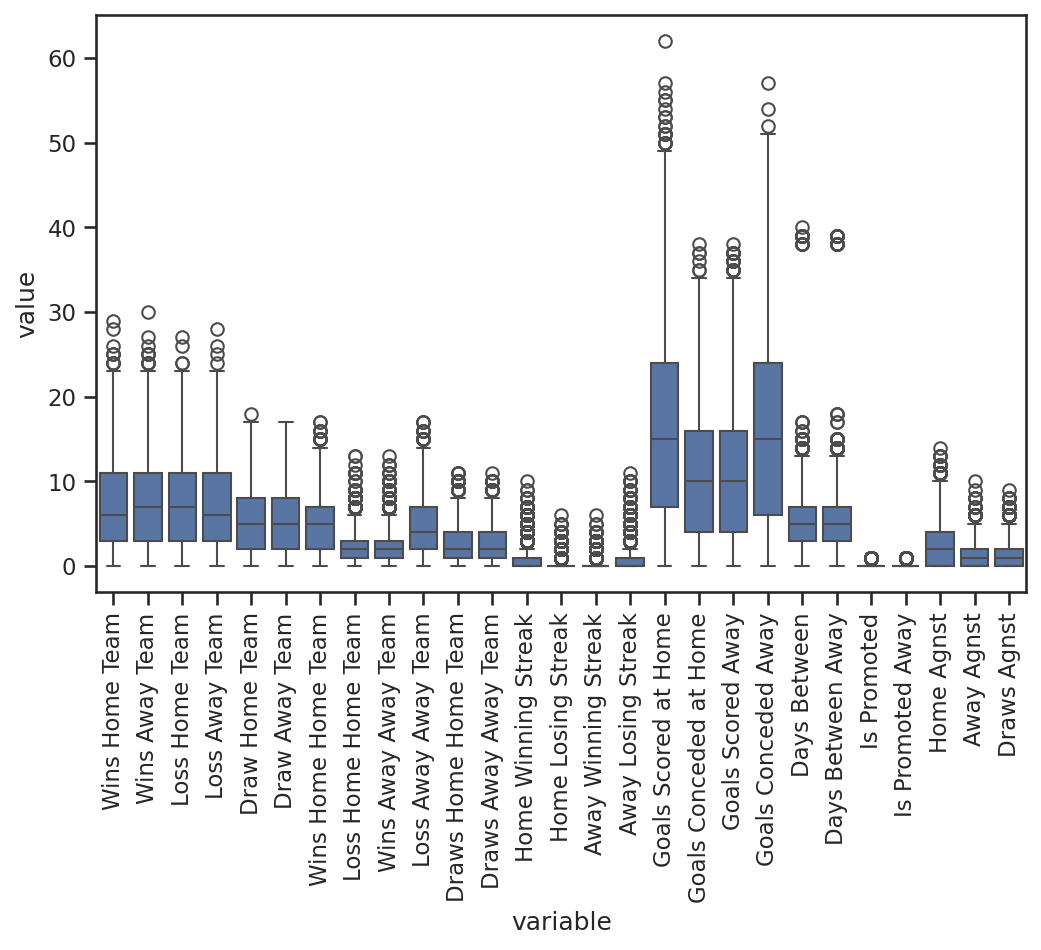

In [50]:
ax = sns.boxplot(x="variable", y="value", data=pd.melt(df[features]))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [51]:
cols = [target]+features

df_useful = df[cols]
corr = df_useful.corr(method='pearson')

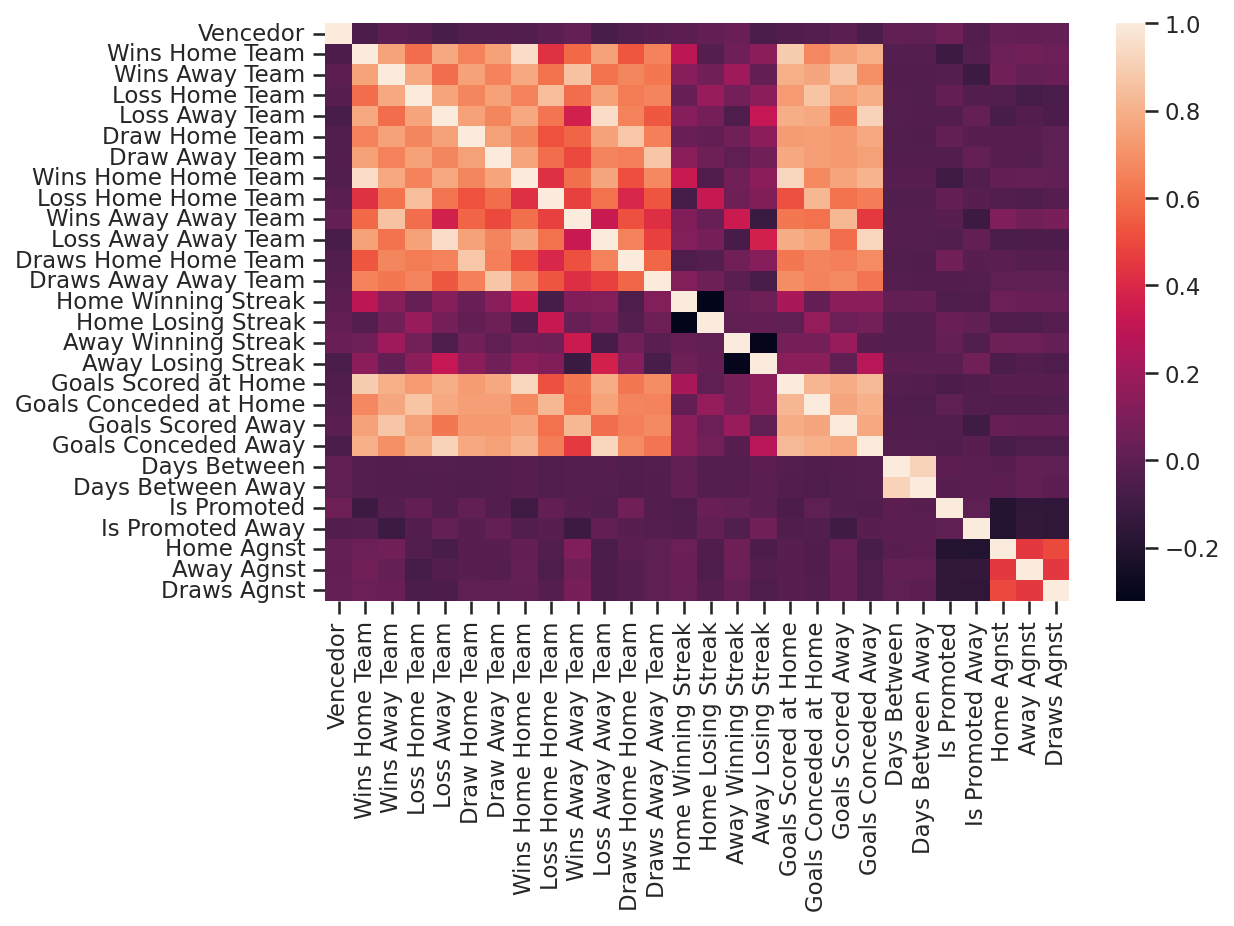

In [52]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

In [53]:
cols = ['Clube 1 Gols', 'Clube 2 Gols']+features

df_useful = df[cols]
corr = df_useful.corr(method='pearson')

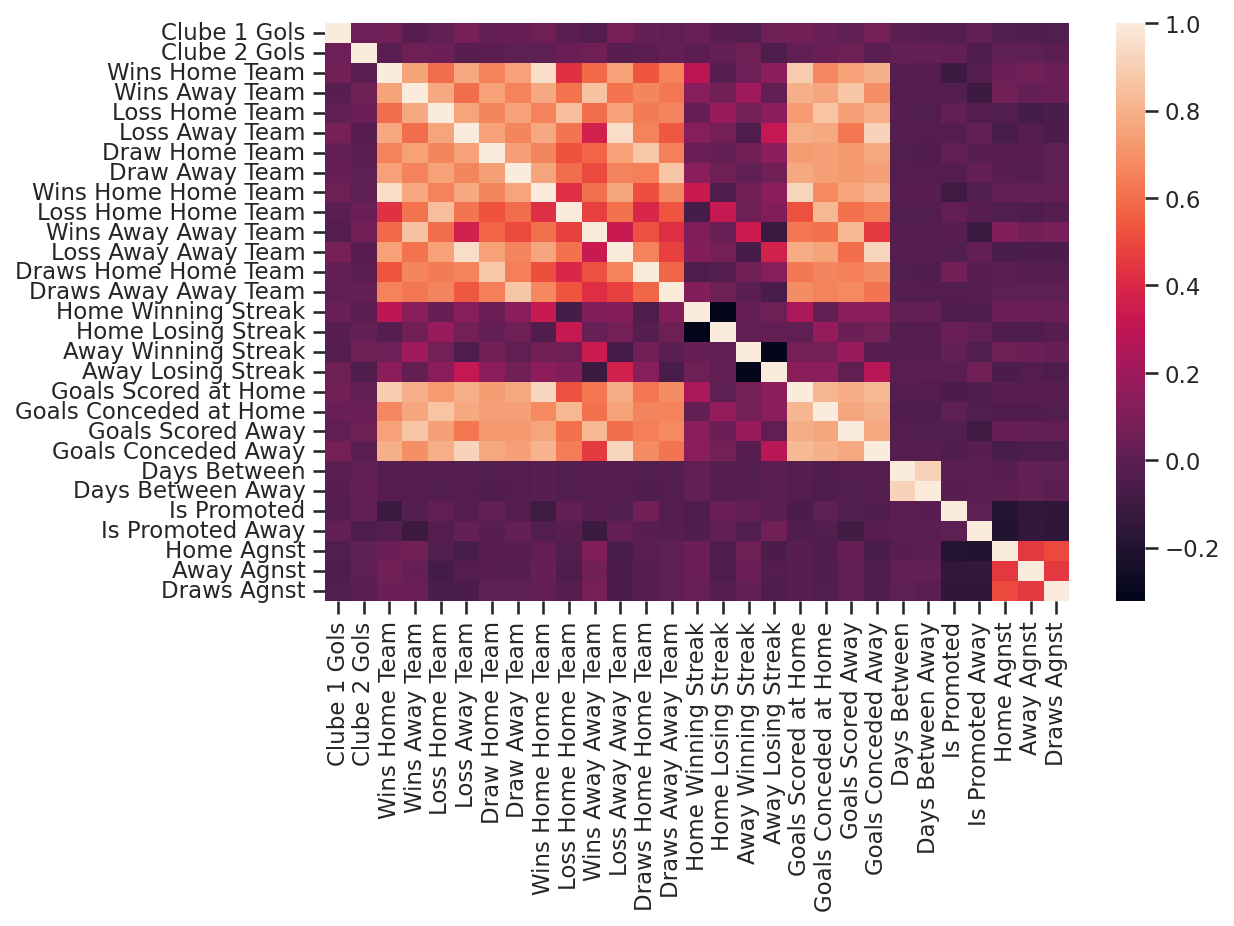

In [54]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

Modelo 1: PCA + Naive Bayes Classifier

In [55]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [56]:
X = df[features]
y = df[target]

In [57]:
scaler = preprocessing.StandardScaler()

scaler.fit(X)
X_scaled = scaler.transform(X)

In [58]:
pca = PCA(n_components=5)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

X_pca_df = pd.DataFrame(X_pca, columns=['V1', 'V2', 'V3', 'V4', 'V5'])
X_pca_df.tail()

,V1,V2,V3,V4,V5
3941,-3.142490,-2.526327,-1.064031,-1.004228,-0.246816
3942,-3.200791,3.922667,-0.722427,1.703456,-0.366911
3943,-3.010868,0.172703,-0.330370,1.471130,2.423125
3944,-2.810166,-1.884380,-1.138072,-1.165304,2.930165
3945,-3.039683,-0.012502,-0.304985,1.276865,-0.755528


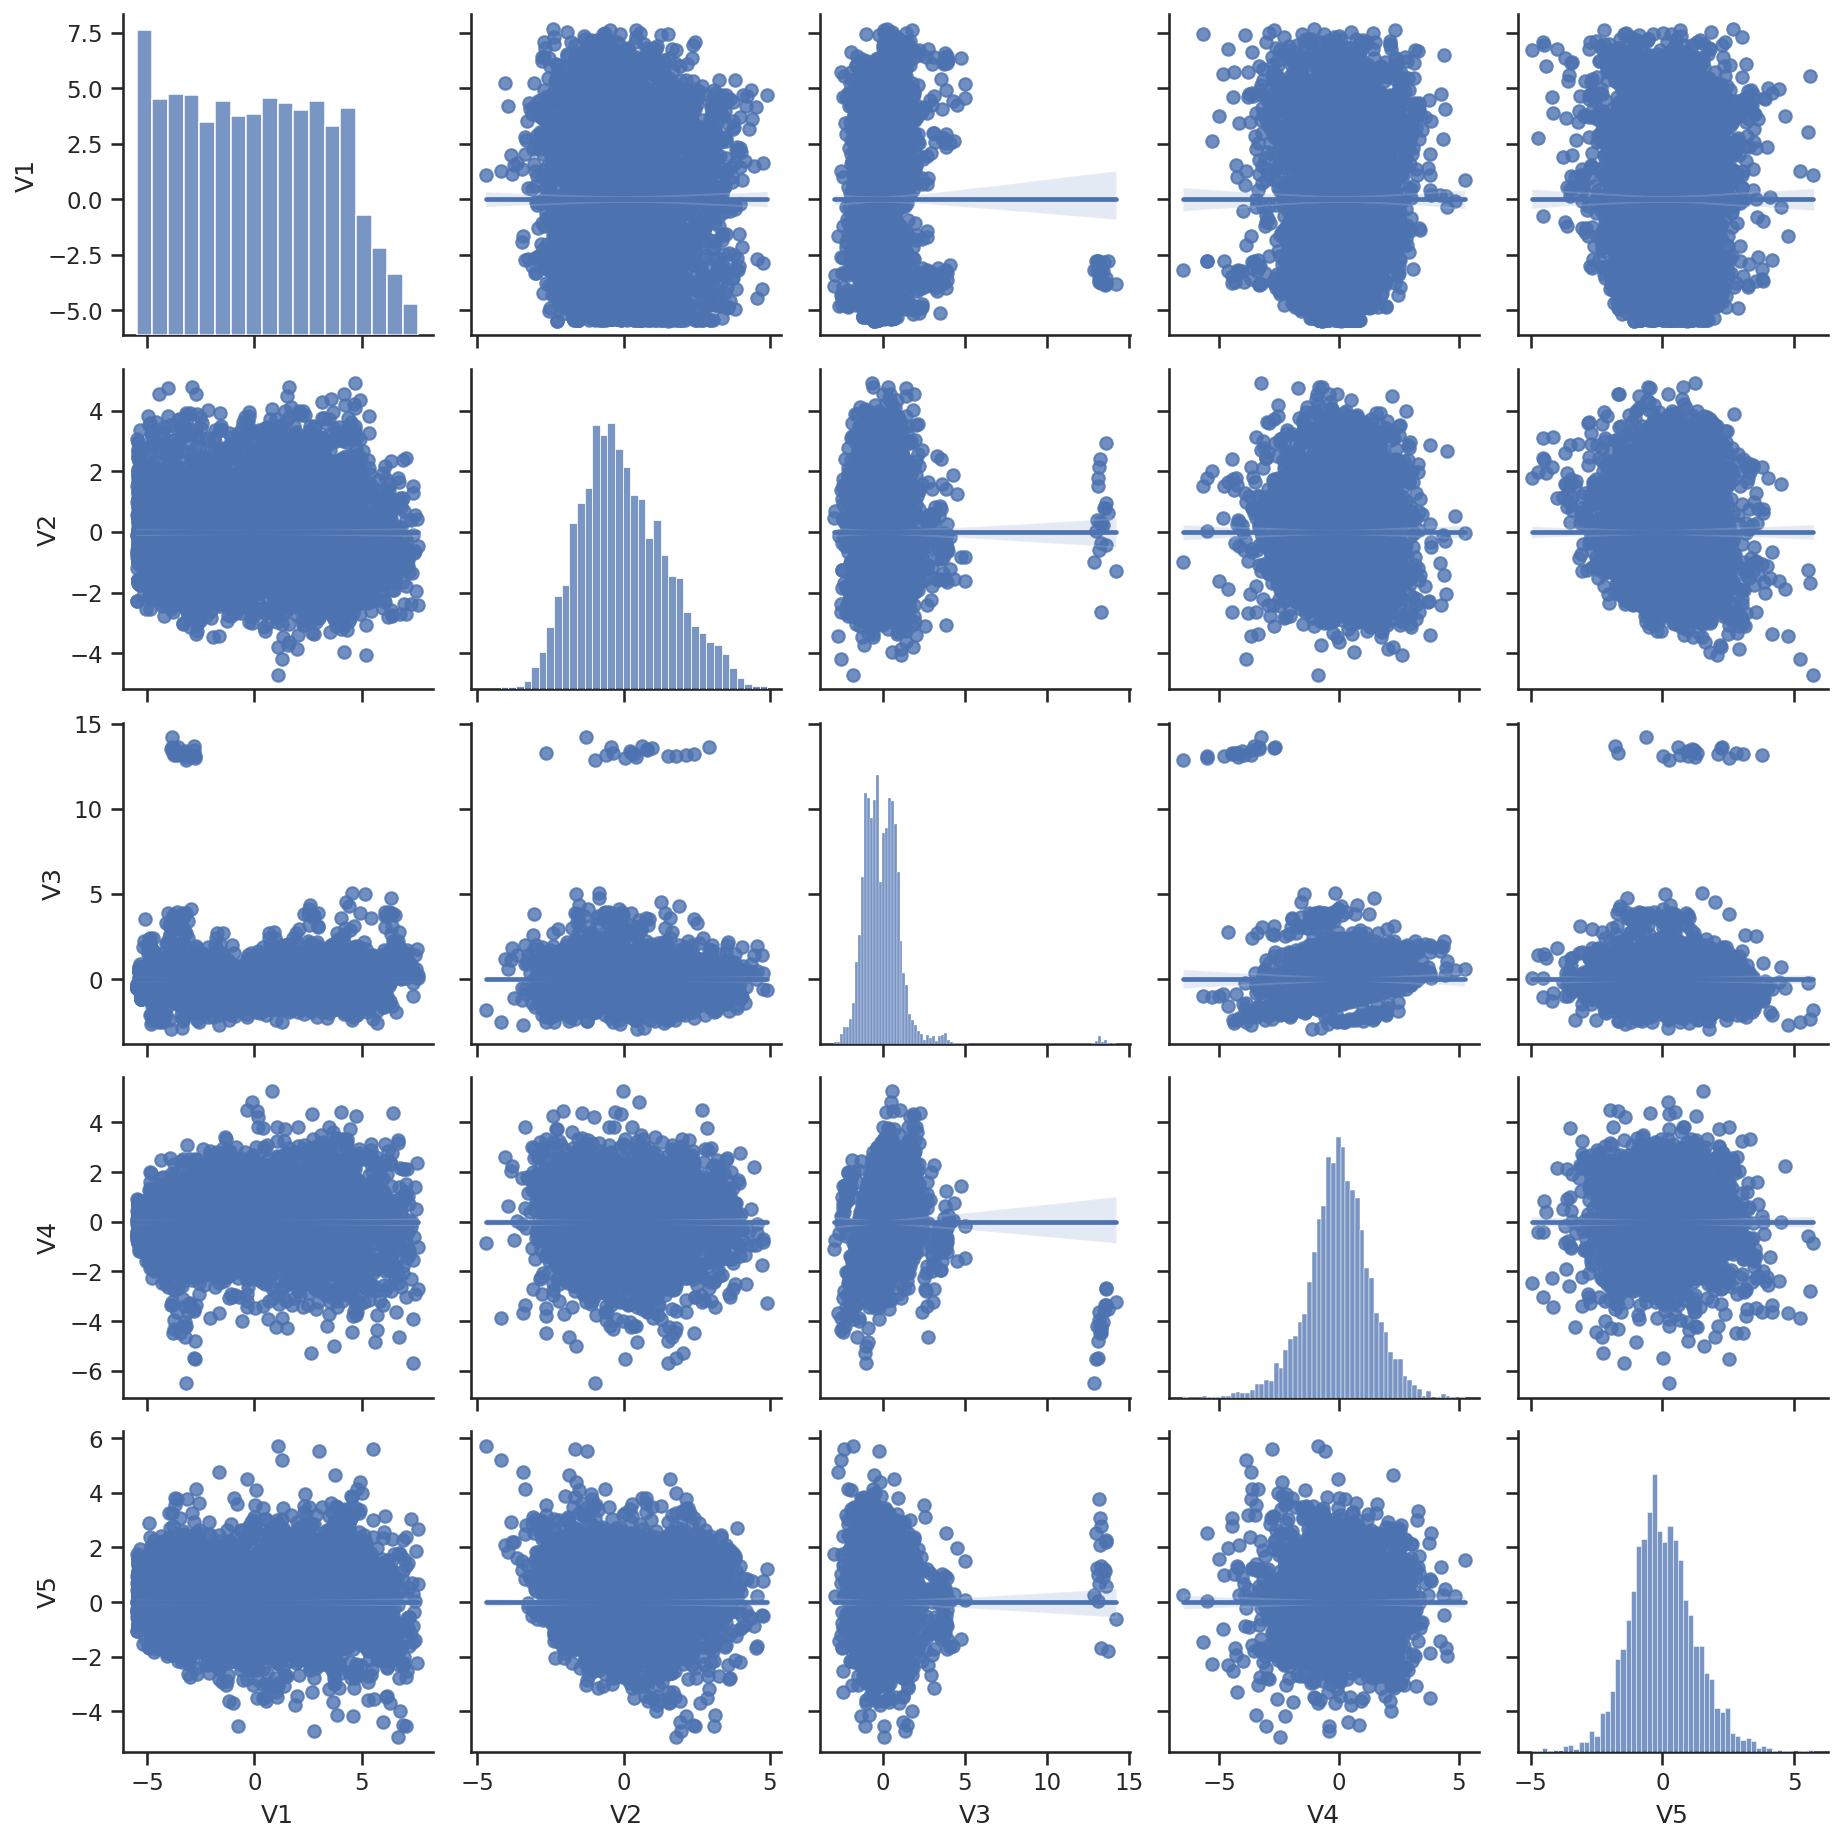

In [59]:
sns.set(style='ticks', color_codes=True)
sns.pairplot(X_pca_df, kind='reg')
plt.show()

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_pca_df, y, random_state=0, test_size=0.3)

clf = GaussianNB()

clf.fit(X_train, y_train)

GaussianNB()

In [61]:
print('Train score: {:.3f}'.format(clf.score(X_train, y_train)))
print('Test score: {:.3f}'.format(clf.score(X_test, y_test)))

Train score: 0.513
Test score: 0.503


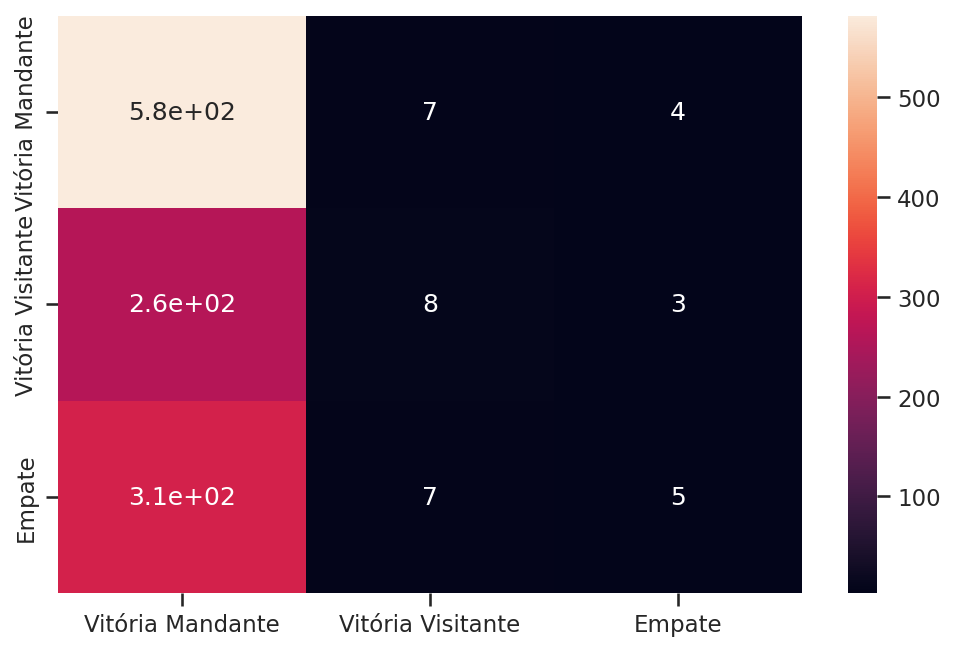

In [62]:
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm, index=['Vitória Mandante', 'Vitória Visitante', 'Empate'],
                    columns=['Vitória Mandante', 'Vitória Visitante', 'Empate'])

sns.heatmap(df_cm, annot=True)
plt.show()

In [63]:
proba_df = pd.DataFrame(clf.predict_proba(X_test))
df_r = df.loc[X_test.index,['Clube 1', 'Clube 2', 'Vencedor']].reset_index(drop=True)

df_rp = df_r.merge(proba_df, left_index=True, right_index=True)
df_rp.tail()

,Clube 1,Clube 2,Vencedor,0,1,2
1179,athlético-pr,goiás,0,0.502932,0.246308,0.250760
1180,internacional,guarani,1,0.637847,0.169280,0.192872
1181,internacional,ceará,1,0.520346,0.225117,0.254537
1182,são paulo,avaí,0,0.611403,0.178505,0.210092
1183,juventude,paysandu,0,0.571627,0.186352,0.242021


Modelo 2: PCA + MLP

In [64]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42)

mlp.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42)

In [65]:
print('Train score: {:.3f}'.format(mlp.score(X_train, y_train)))
print('Test score: {:.3f}'.format(mlp.score(X_test, y_test)))

Train score: 0.535
Test score: 0.488


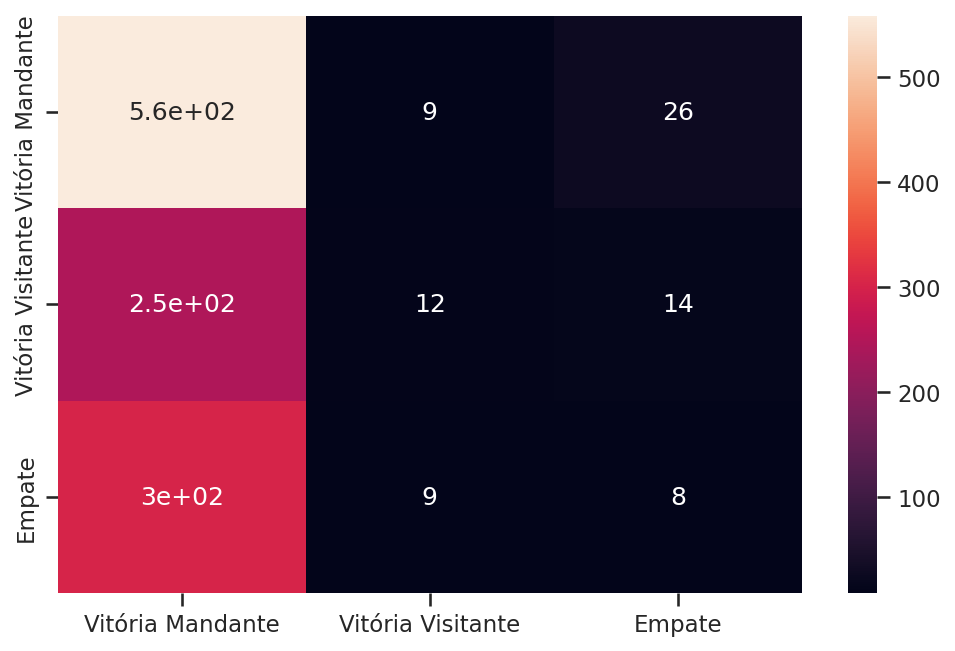

In [66]:
y_pred = mlp.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm, index=['Vitória Mandante', 'Vitória Visitante', 'Empate'],
                    columns=['Vitória Mandante', 'Vitória Visitante', 'Empate'])

sns.heatmap(df_cm, annot=True)
plt.show()

In [67]:
proba_df = pd.DataFrame(mlp.predict_proba(X_test))
df_r = df.loc[X_test.index,['Clube 1', 'Clube 2', 'Vencedor']].reset_index(drop=True)

df_rp = df_r.merge(proba_df, left_index=True, right_index=True)
df_rp.tail()

,Clube 1,Clube 2,Vencedor,0,1,2
1179,athlético-pr,goiás,0,0.516579,0.283453,0.199969
1180,internacional,guarani,1,0.611993,0.157271,0.230736
1181,internacional,ceará,1,0.490052,0.233680,0.276269
1182,são paulo,avaí,0,0.609078,0.168154,0.222768
1183,juventude,paysandu,0,0.566003,0.208974,0.225023
